<a href="https://colab.research.google.com/github/suriya-mouli/CNN_Model/blob/main/fire_non_fire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Create folder structure first
!mkdir -p /content/data/fire_images/content/data/non_fire_images /content/data/logs /content/models

In [ ]:
# CLEAN PREVIOUS DATA FIRST
import shutil
shutil.rmtree('/content/data', ignore_errors=True)

# Step 2: Upload Fire images directly to Fire folder
from google.colab import files
import shutil
import os

base_dir = '/content/data'
fire_dir = os.path.join(base_dir, 'fire_images')
nonfire_dir = os.path.join(base_dir, 'non_fire_images')

os.makedirs(fire_dir, exist_ok=True)
os.makedirs(nonfire_dir, exist_ok=True)

print(" Clean directories created:")
!find /content/data -type d

print("\n Upload Fire images...")
fire_images_uploaded = files.upload()

for filename in fire_images_uploaded.keys():
    shutil.move(filename, os.path.join(fire_dir, filename))

print(f" Uploaded {len(fire_images_uploaded)} Fire images.")


print("\n Upload Non-Fire images...")
non_fire_images_uploaded = files.upload()

for filename in non_fire_images_uploaded.keys():
    shutil.move(filename, os.path.join(nonfire_dir, filename))

print(f" Uploaded {len(non_fire_images_uploaded)} Non-Fire images.")


print("\nFinal Folder Structure:")
!find /content/data -type d


 Clean directories created:
/content/data
/content/data/non_fire_images
/content/data/fire_images

 Upload Fire images...


Saving fire.97.png to fire.97.png
Saving fire.98.png to fire.98.png
Saving fire.99.png to fire.99.png
Saving fire.90.png to fire.90.png
Saving fire.91.png to fire.91.png
Saving fire.92.png to fire.92.png
Saving fire.93.png to fire.93.png
Saving fire.94.png to fire.94.png
Saving fire.95.png to fire.95.png
Saving fire.96.png to fire.96.png
Saving fire.8.png to fire.8.png
Saving fire.9.png to fire.9.png
Saving fire.78.png to fire.78.png
Saving fire.79.png to fire.79.png
Saving fire.80.png to fire.80.png
Saving fire.81.png to fire.81.png
Saving fire.82.png to fire.82.png
Saving fire.83.png to fire.83.png
Saving fire.84.png to fire.84.png
Saving fire.85.png to fire.85.png
Saving fire.86.png to fire.86.png
Saving fire.87.png to fire.87.png
Saving fire.88.png to fire.88.png
Saving fire.89.png to fire.89.png
Saving fire.75.png to fire.75.png
Saving fire.76.png to fire.76.png
Saving fire.77.png to fire.77.png
Saving fire.745.png to fire.745.png
Saving fire.746.png to fire.746.png
Saving fire.74

Saving non_fire.98.png to non_fire.98.png
Saving non_fire.99.png to non_fire.99.png
Saving non_fire.91.png to non_fire.91.png
Saving non_fire.92.png to non_fire.92.png
Saving non_fire.93.png to non_fire.93.png
Saving non_fire.94.png to non_fire.94.png
Saving non_fire.95.png to non_fire.95.png
Saving non_fire.96.png to non_fire.96.png
Saving non_fire.97.png to non_fire.97.png
Saving non_fire.9.png to non_fire.9.png
Saving non_fire.82.png to non_fire.82.png
Saving non_fire.83.png to non_fire.83.png
Saving non_fire.84.png to non_fire.84.png
Saving non_fire.85.png to non_fire.85.png
Saving non_fire.86.png to non_fire.86.png
Saving non_fire.87.png to non_fire.87.png
Saving non_fire.88.png to non_fire.88.png
Saving non_fire.89.png to non_fire.89.png
Saving non_fire.90.png to non_fire.90.png
Saving non_fire.8.png to non_fire.8.png
Saving non_fire.73.png to non_fire.73.png
Saving non_fire.74.png to non_fire.74.png
Saving non_fire.75.png to non_fire.75.png
Saving non_fire.76.png to non_fire.76.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
import imghdr
from PIL import Image
import shutil
from google.colab import files


In [ ]:
os.path.join('data', 'fire_images')

'data/fire_images'

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
len(gpus)

1

In [ ]:
import cv2
import imghdr

In [ ]:
# setting up path variable
data_dir = '/content/data'

image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(' Removing incompatible image: {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print(' Issue with image {}, removing: {}'.format(image_path, e))
            os.remove(image_path)

In [ ]:
# STEP 1: Check current structure
print(" Current folder structure:")
!find /content/data -type d

# STEP 2: Remove extra folders (keep only fire_images and non_fire_images)
import shutil
import os

folders_to_keep = ['fire_images', 'non_fire_images']

for folder in os.listdir('/content/data'):
    folder_path = os.path.join('/content/data', folder)
    if os.path.isdir(folder_path) and folder not in folders_to_keep:
        shutil.rmtree(folder_path)
        print(f"Removed: {folder}")

# STEP 3: Reload dataset
import tensorflow as tf
import numpy as np

data = tf.keras.utils.image_dataset_from_directory(
    '/content/data',
    class_names=['fire_images', 'non_fire_images'],  # Force 2 classes
    image_size=(256, 256),
    batch_size=32
)

print(f"Classes: {data.class_names}")

# STEP 4: Verify labels
batch = data.as_numpy_iterator().next()
images, labels = batch
print(f" Label distribution in batch: {np.unique(labels, return_counts=True)}")


 Current folder structure:
/content/data
/content/data/non_fire_images
/content/data/fire_images
Found 203 files belonging to 2 classes.
Classes: ['fire_images', 'non_fire_images']
 Label distribution in batch: (array([0, 1], dtype=int32), array([18, 14]))


In [ ]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# accessig 'kera' 's predefined data pipeline function
# building our data pipeline
# Recreating the dataset after image cleaning to ensure only valid images are loaded
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 203 files belonging to 2 classes.


In [ ]:
# allowing to access our data pipeline
data_iterator = data.as_numpy_iterator()

In [ ]:
# accessing the dta pipeline itself
batch = data_iterator.next()

In [ ]:
# output : 2 (images, labels)
len(batch)

2

In [ ]:
# images represented by numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [ ]:
# class 1 - fire_images
# class 2 - non_fire_images
batch[1]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int32)

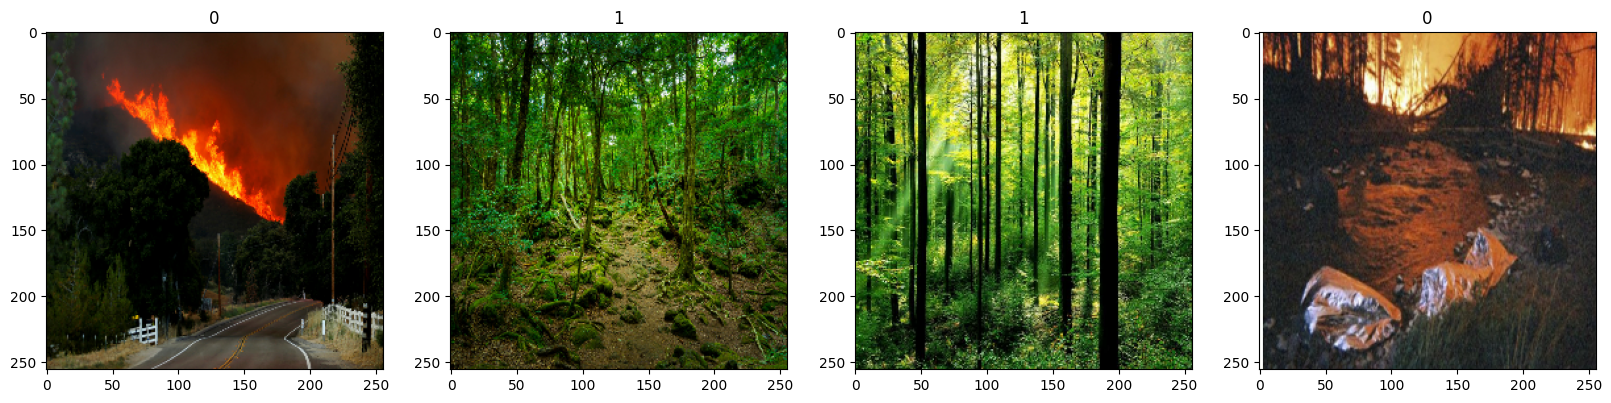

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# dividing by 255 to keep data between 0 & 1
scaled = batch[0] / 255

In [ ]:
# check purpose
scaled.max()

np.float32(1.0)

In [ ]:
# data.map -> allows transformation in pipeline
# x -> images (independent features, as in INPUT)
# y -> target variable
# no transformation on y
# go tf.data.dataset to explore more functions
data = data.map(lambda x,y: (x/255, y))

In [ ]:
# Get the iterator from the scaled dataset
scaled_iterator = data.as_numpy_iterator()

In [ ]:
# Get the next batch from the iterator
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

np.float32(0.0)

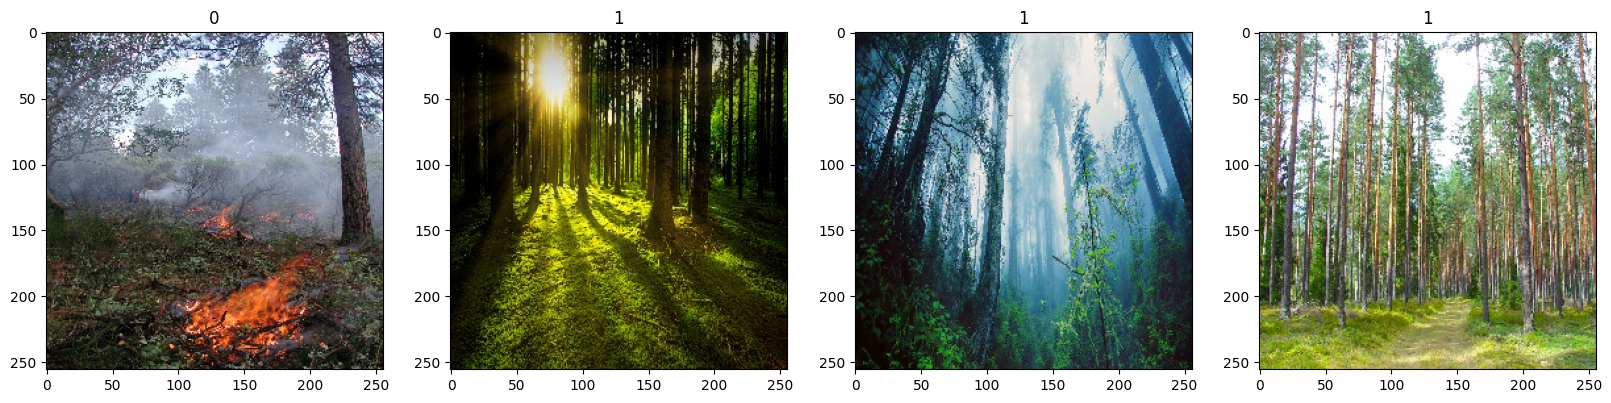

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
# output : 7 -> That means we have 7 batches
len (data)

7

In [ ]:
train_size = int((len(data) * 0.7))   # 70% of 201 = 140.7 → 140
val_size = int((len(data) * 0.2))     # 20% of 201 = 40.2 → 40
test_size = len(data) - train_size - val_size  # Remaining = 21

print(f"📊 Dataset Split Summary:")
print(f"   Training set: {train_size} images")
print(f"   Validation set: {val_size} images")
print(f"   Test set: {test_size} images")

📊 Dataset Split Summary:
   Training set: 4 images
   Validation set: 1 images
   Test set: 2 images


In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# DL Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# Build the Sequential CNN model
model = models.Sequential([

    # Input layer + rescaling
    layers.Input(shape=(256, 256, 3)),   # Match your dataset image size
    layers.Rescaling(1./255),            # Normalize pixel values (0–1)

    # First convolution block
    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    #  Second convolution block
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # 4️Third convolution block
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2,2)),

    # Flatten and fully connected layers
    layers.Flatten(),
    layers.Dropout(0.4),                 # Reduce overfitting
    layers.Dense(128, activation='relu'),

    # Output layer
    layers.Dense(1, activation='sigmoid')  # Binary classification (fire or non-fire)
])

# Show model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,870,721 (64.36 MB)

 Trainable params: 16,870,721 (64.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers, metrics

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy', metrics.Precision(), metrics.Recall()]
)

print(" Model compiled successfully and ready for training!")


 Model compiled successfully and ready for training!


In [ ]:
logdir='logs'

In [ ]:
# callback = to save the model at some perticular checkpoint
# This is for logout of the training model
# also to see back how well the model performed at some specific point
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# hist = history
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 4s/step - accuracy: 0.4062 - loss: 0.6932 - precision_1: 0.3889 - recall_1: 0.4967 - val_accuracy: 0.9062 - val_loss: 0.6926 - val_precision_1: 0.8636 - val_recall_1: 1.0000
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.7437 - loss: 0.6922 - precision_1: 0.6726 - recall_1: 0.9644 - val_accuracy: 0.6875 - val_loss: 0.6902 - val_precision_1: 0.6296 - val_recall_1: 1.0000
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.7115 - loss: 0.6902 - precision_1: 0.6149 - recall_1: 0.9597 - val_accuracy: 0.6875 - val_loss: 0.6885 - val_precision_1: 0.5455 - val_recall_1: 1.0000
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.8250 - loss: 0.6862 - precision_1: 0.7254 - recall_1: 0.9932 - val_accuracy: 0.8750 - val_loss: 0.6805 - val_precision_1: 0.7857 - val_recall_1: 0.9167
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 4s/step - accuracy: 0.7552 - loss: 0.6829 - precision_1: 0.7885 - recall_1: 0.6248 - val_accuracy: 0.781

In [ ]:
# Evaluate the model using the 'val' dataset
loss, acc, prec, rec = model.evaluate(val)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9375 - loss: 0.4191 - precision_1: 0.9500 - recall_1: 0.9500
Validation Loss: 0.4191
Validation Accuracy: 0.9375


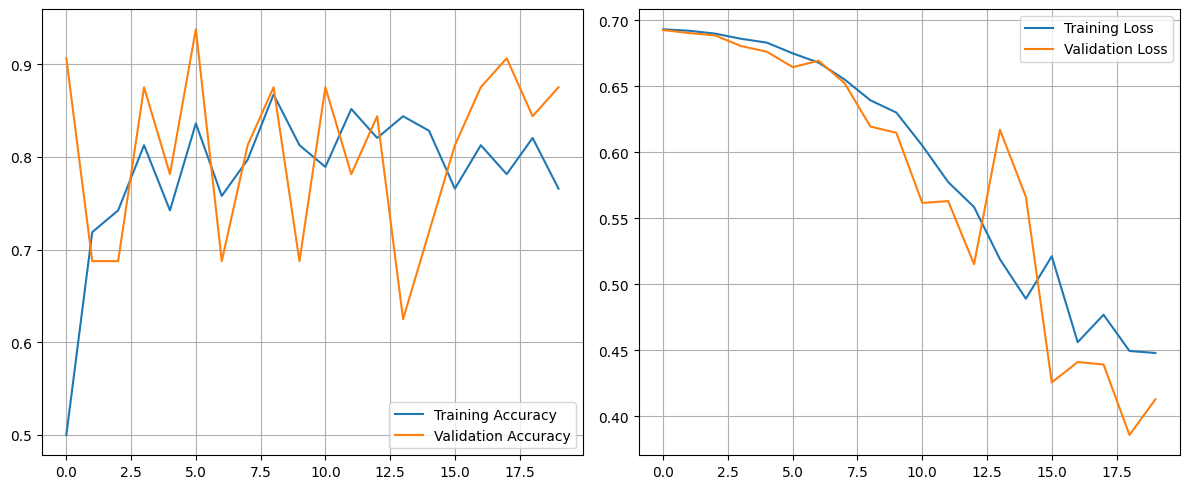

In [ ]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.grid(True)

#  Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7916667, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.8780488, shape=(), dtype=float32)


In [ ]:
#Test

import cv2

In [ ]:
#from google.colab import files

#uploaded = files.upload()  # This will open a file picker


Saving images.jpg to images.jpg


In [ ]:
img_path = "/content/images.jpg"

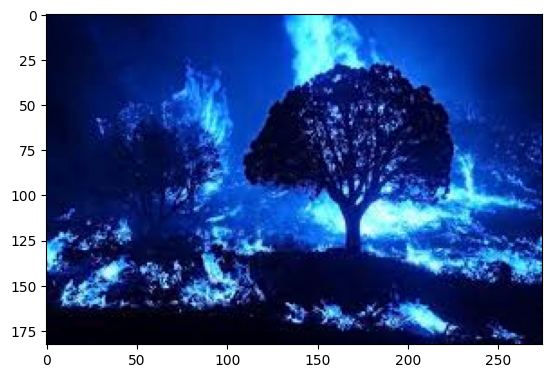

In [ ]:
img = cv2.imread("/content/images.jpg")
plt.imshow(img)
plt.show()

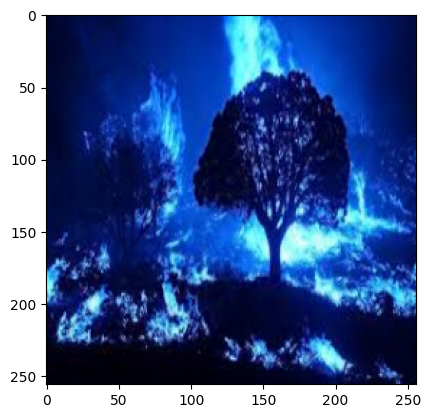

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# Preprocess image
img_tensor = tf.expand_dims(resize/255.0, axis=0)
yhat = model.predict(img_tensor)[0][0]
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


np.float32(0.7065606)

In [ ]:
# Print prediction in if-else format
if yhat > 0.5:
    print(f'Predicted class is Fire')
else:
    print(f'Predicted class is No Fire')

Predicted class is Fire


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# h5 = serialization model format
model.save(os.path.join('models','firenonfireclassification.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'firenonfireclassification.h5'))

In [ ]:
new_model

<Sequential name=sequential, built=True>

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.7065606]], dtype=float32)